**Asal Sekolah: SMKN 1 Surabaya**

**Nama Peserta: Davino Edric dan Muhammad Shofian Najib**

**No. Peserta: -**

# 1. Import dan EDA

In [207]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [208]:
df = pd.read_csv('Project1-invoice-data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [210]:
bukan_member = df[df['CustomerID'].isna()]
bukan_member['Country'].value_counts()

Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: count, dtype: int64

In [211]:
no_desc = df[df['Description'].isna()]
no_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 622 to 538554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1454 non-null   object 
 1   StockCode    1454 non-null   object 
 2   Description  0 non-null      object 
 3   Quantity     1454 non-null   int64  
 4   InvoiceDate  1454 non-null   object 
 5   UnitPrice    1454 non-null   float64
 6   CustomerID   0 non-null      float64
 7   Country      1454 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 102.2+ KB


In [212]:
no_desc['Country'].value_counts()

Country
United Kingdom    1454
Name: count, dtype: int64

In [213]:
no_desc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


In [214]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [215]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 1.1 Mengecek Jumlah Transaksi per negara

In [216]:
country_transaction_data = df.groupby('Country')['Quantity'].agg(['mean','median','max','min','sum','count']).sort_values(by='sum',ascending=True)
country_transaction_data

,mean,median,max,min,sum,count
Country,,,,,,
Saudi Arabia,7.500000,9.0,12,-5,75,10
Bahrain,13.684211,6.0,96,-54,260,19
RSA,6.068966,6.0,12,1,352,58
Brazil,11.125000,10.0,24,2,356,32
Lebanon,8.577778,8.0,24,2,386,45
European Community,8.147541,6.0,24,-2,497,61
Czech Republic,19.733333,24.0,72,-24,592,30
Lithuania,18.628571,16.0,48,6,652,35
Malta,7.433071,6.0,48,-4,944,127


## 1.2 Distribusi Quantity dan UnitPrice

In [217]:
# for i in df[['UnitPrice','Quantity']]:
#     sns.histplot(df[i],kde=True)
#     plt.show()

In [218]:
# for i in ['UnitPrice', 'Quantity']:
#     sns.histplot(np.log1p(df[i][df[i] > 0]), kde=True)
#     plt.title(f'Log Distribution of {i}')
#     plt.show()

In [219]:
# sns.boxplot(x=np.log1p(df['Quantity']))
# plt.show()

## 1.3 Statistik Deskriptif

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1.4 Mengecek Barang yang paling populer berdasarkan jumlah yang terjual

In [221]:
item_popularity_data = df.groupby('Description')['Quantity'].agg(['mean','median','max','min','sum','count']).sort_values(by='sum',ascending=True)
item_popularity_data.tail(20)

,mean,median,max,min,sum,count
Description,,,,,,
PARTY BUNTING,10.435437,4.0,200,-100,18022,1727
60 TEATIME FAIRY CAKE CASES,20.711825,6.0,960,-27,18040,871
LUNCH BAG RED RETROSPOT,11.464591,10.0,200,-100,18779,1638
PAPER CHAIN KIT 50'S CHRISTMAS,15.621488,6.0,1020,-120,18902,1210
SMALL POPCORN HOLDER,32.923077,10.0,4300,-12,20116,611
JUMBO BAG PINK POLKADOT,16.793765,9.0,800,-200,21009,1251
RED HARMONICA IN BOX,32.346154,12.0,2100,-12,21866,676
BROCADE RING PURSE,94.093878,36.0,720,-1,23053,245
ASSORTED COLOURS SILK FAN,44.133843,12.0,1200,-600,23082,523


## 1.5 Mengecek Korelasi data

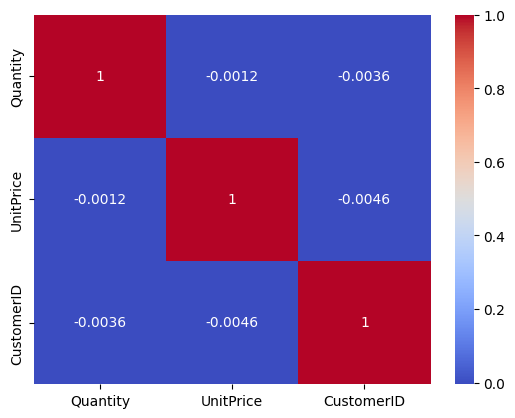

In [222]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='coolwarm')
plt.show()

In [223]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 2. Data Pre Processing

## 2.1 Drop kolom yang tidak relevan

In [224]:
df_backup = df.copy(deep=True)

In [225]:
# df.drop(columns='StockCode',inplace=True)

## 2.2 Feature Engineering Waktu

In [226]:
## Engineer Datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df['Hour'] = df['Hour'] + (df['Minute'] / 60)
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Day'] = df['InvoiceDate'].dt.dayofweek
df['Weekend'] = df['Day'].isin([5,6])
df['Time_of_Day'] = df['Hour'].apply(lambda x: 'Malam' if x <6 else ('Pagi' if x <=12 else('Siang' if x <15 else('Sore' if x <=19 else 'Malam'))))

## Other engineering related to Datetime
df.drop(columns='Minute',inplace=True)
max_time = df['InvoiceDate'].max()
min_time = df['InvoiceDate'].min()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Year,Day,Weekend,Time_of_Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi


In [227]:
print(min_time,'/',max_time)

2010-12-01 08:26:00 / 2011-12-09 12:50:00


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Hour         541909 non-null  float64       
 9   Month        541909 non-null  int32         
 10  Year         541909 non-null  int32         
 11  Day          541909 non-null  int32         
 12  Weekend      541909 non-null  bool          
 13  Time_of_Day  541909 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usag

In [229]:
df = df.dropna(subset=['Description'])
df = df[df['UnitPrice'] > (-1)]

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540453 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540453 non-null  object        
 1   StockCode    540453 non-null  object        
 2   Description  540453 non-null  object        
 3   Quantity     540453 non-null  int64         
 4   InvoiceDate  540453 non-null  datetime64[ns]
 5   UnitPrice    540453 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540453 non-null  object        
 8   Hour         540453 non-null  float64       
 9   Month        540453 non-null  int32         
 10  Year         540453 non-null  int32         
 11  Day          540453 non-null  int32         
 12  Weekend      540453 non-null  bool          
 13  Time_of_Day  540453 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usage: 52

In [231]:
df['Country'].value_counts()

Country
United Kingdom          494022
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [232]:
bukan_member['Description'].value_counts()

Description
DOTCOM POSTAGE                       693
JUMBO BAG RED RETROSPOT              497
JUMBO STORAGE BAG SUKI               414
JUMBO SHOPPER VINTAGE RED PAISLEY    388
JUMBO BAG WOODLAND ANIMALS           372
                                    ... 
???lost                                1
amazon adjust                          1
missing?                               1
CLEAR ACRYLIC FACETED BANGLE           1
lost??                                 1
Name: count, Length: 3554, dtype: int64

In [233]:
adf = df[df['Description'].str.islower()]

In [234]:
adf['Description'].value_counts()

Description
check                    159
damages                   45
damaged                   43
found                     25
sold as set on dotcom     20
                        ... 
wet?                       1
wet                        1
wet boxes                  1
????damages????            1
lost                       1
Name: count, Length: 127, dtype: int64

In [235]:
df = df[~df['Description'].str.islower()]

In [236]:
_desc = df['Description'].value_counts()

In [237]:
anomaly_desc = _desc[_desc <= 2400]
anomaly_desc

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
WRAP  PINK FLOCK                          1
SET 10 CARDS SWIRLY XMAS TREE 17104       1
SET 10 CARDS SNOWY ROBIN 17099            1
Wrongly mrked had 85123a in box           1
CROCHET LILAC/RED BEAR KEYRING            1
Name: count, Length: 4096, dtype: int64

In [238]:
_desc

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
WRAP  PINK FLOCK                          1
SET 10 CARDS SWIRLY XMAS TREE 17104       1
SET 10 CARDS SNOWY ROBIN 17099            1
Wrongly mrked had 85123a in box           1
CROCHET LILAC/RED BEAR KEYRING            1
Name: count, Length: 4096, dtype: int64

In [239]:
df['CustomerID'] = df['CustomerID'].fillna('Not a Member')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539960 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539960 non-null  object        
 1   StockCode    539960 non-null  object        
 2   Description  539960 non-null  object        
 3   Quantity     539960 non-null  int64         
 4   InvoiceDate  539960 non-null  datetime64[ns]
 5   UnitPrice    539960 non-null  float64       
 6   CustomerID   539960 non-null  object        
 7   Country      539960 non-null  object        
 8   Hour         539960 non-null  float64       
 9   Month        539960 non-null  int32         
 10  Year         539960 non-null  int32         
 11  Day          539960 non-null  int32         
 12  Weekend      539960 non-null  bool          
 13  Time_of_Day  539960 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int32(3), int64(1), object(6)
memory usage: 52

In [242]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

df = df[(df['Revenue']) > 0 & (df['Revenue'] < df['Revenue'].quantile(0.85))]
df = df[(df['Quantity']) >0 & (df['Quantity'] < df['Quantity'].quantile(0.85))]
df = df[(df['UnitPrice']) > 0 & (df['UnitPrice'] < df['UnitPrice'].quantile(0.85))]


df['Log_Revenue'] = np.log1p(df['Revenue'])
df['Log_Price'] = np.log1p(df['UnitPrice'])
df['Log_Quantity'] = np.log1p(df['Quantity'])

In [243]:
country_numerical_rank = df.groupby('Country')[['UnitPrice','Quantity','Month','Revenue']].agg(['mean','median','min','count','std']).sort_values(('Revenue','mean'),ascending=True)
country_numerical_rank

UnitPrice                                     Quantity  \
                           mean median    min   count         std       mean   
Country                                                                        
Unspecified            2.699574  1.650  0.190     446    2.866079   7.399103   
Saudi Arabia           2.351111  1.650  0.420       9    1.455356   8.888889   
RSA                    4.352632  2.950  0.420      57    3.655848   6.157895   
United Kingdom         3.849679  2.100  0.001  485123   34.677371   9.610738   
USA                    2.308939  1.450  0.420     179    2.308709  13.731844   
Belgium                3.630158  1.950  0.120    2031    4.247654  11.441162   
European Community     4.830000  3.150  0.550      60    4.412100   8.316667   
Cyprus                 5.710391  2.950  0.120     614   18.577903  10.359935   
Poland                 4.173364  2.080  0.190     330    5.980519  11.163636   
Portugal               5.843251  1.650  0.120    1501   50.941288  10.831446   
Italy                  4.717955  2.175  0.120     758   12.074970  10.701847   
Iceland                2.644011  2.015  0.250     182    2.255381  13.505495   
Canada                 6.030331  1.650  0.100     151   44.713675  18.298013   
Malta                  4.867768  2.950  0.190     112    8.120693   8.660714   
Spain                  3.826224  2.080  0.120    2484    5.224177  11.247987   
France                 4.400237  1.790  0.060    8407   65.509139  13.334483   
Germany                3.709308  1.950  0.040    9040   13.156619  13.192588   
Austria                4.256030  1.950  0.120     398    7.380100  12.263819   
Channel Islands        4.531618  2.550  0.190     748   11.552776  12.688503   
Israel                 3.630441  1.950  0.060     295    8.632186  14.945763   
United Arab Emirates   3.380735  1.670  0.290      68    5.342353  14.441176   
Switzerland            3.374547  1.650  0.120    1966    5.356897  15.579349   
Greece                 4.574414  2.100  0.140     145    7.616430  10.737931   
Finland                5.296993  2.080  0.120     685   13.489575  15.626277   
Czech Republic         3.130800  1.250  0.290      25    7.774781  26.840000   
Norway                 5.287087  2.080  0.060    1071   26.799807  18.054155   
Brazil                 4.456250  3.320  0.850      32    2.831727  11.125000   
EIRE                   4.878321  2.100  0.040    7890   38.054353  18.653105   
Lebanon                5.387556  3.950  0.550      45    4.068741   8.577778   
Bahrain                4.597778  3.380  1.250      18    3.569367  17.444444   
Lithuania              2.841143  2.550  1.250      35    1.366849  18.628571   
Denmark                3.146184  1.950  0.210     380    3.787830  21.671053   
Hong Kong             23.474437  2.100  0.210     284  220.035553  16.806338   
Sweden                 3.760067  1.450  0.190     451    8.028722  80.006652   
Singapore             58.333288  2.100  0.190     222  373.926856  23.608108   
Japan                  2.047383  1.450  0.210     321    1.822802  81.046729   
Australia              3.056261  1.790  0.190    1182   10.386500  70.982234   
Netherlands            2.648465  1.450  0.190    2359    4.717671  84.934718   

                                                         Month             \
                     median min   count         std       mean median min   
Country                                                                     
Unspecified             3.0   1     446    8.765735   7.434978    7.0   4   
Saudi Arabia           12.0   2       9    3.887301   2.000000    2.0   2   
RSA                     6.0   2      57    3.288451  10.000000   10.0  10   
United Kingdom          3.0   1  485123  161.904143   7.581661    8.0   1   
USA                    12.0   1     179   11.488423   9.620112   10.0   4   
Belgium                10.0   1    2031   13.597680   7.404727    8.0   1   
European Community      6.0   1      60    6.466

In [244]:
country_numerical_rank_logged = df.groupby('Country')[['Log_Revenue','Log_Price','Log_Quantity']].agg(['mean','median','min','count','std']).sort_values(('Log_Revenue','mean'),ascending=True)
country_numerical_rank_logged

Log_Revenue                                        \
                            mean    median       min   count       std   
Country                                                                  
Unspecified             2.101582  2.282369  0.173953     446  0.889892   
United Kingdom          2.262251  2.242835  0.001000  485123  1.002487   
Portugal                2.721850  2.827314  0.254642    1501  0.872906   
Spain                   2.724791  2.772589  0.190620    2484  0.857671   
Cyprus                  2.737231  2.862201  0.604316     614  0.895405   
Saudi Arabia            2.787158  2.928524  1.798404       9  0.407712   
Canada                  2.837548  2.862201  1.252763     151  0.622607   
RSA                     2.868235  2.862201  1.798404      57  0.339446   
USA                     2.877100  2.867899  0.810930     179  0.575704   
France                  2.904891  2.867899  0.254642    8407  0.731428   
Belgium                 2.908499  2.867899  1.252763    2031  0.509369   
Malta                   2.924576  2.901361  1.187843     112  0.618000   
Israel                  2.931459  2.936513  0.667829     295  0.912730   
Germany                 2.967507  2.890372  0.329304    9040  0.682818   
Austria                 2.986130  2.899728  1.355835     398  0.653396   
Poland                  3.009687  2.912351  2.028148     330  0.481249   
Iceland                 3.019914  2.890372  1.798404     182  0.537449   
Italy                   3.021930  2.928524  1.355835     758  0.500183   
European Community      3.031000  2.928524  2.174752      60  0.408226   
Switzerland             3.033302  2.928524  0.350657    1966  0.806899   
Channel Islands         3.085639  2.928524  1.715598     748  0.580088   
EIRE                    3.095082  2.912351  0.350657    7890  0.803864   
Finland                 3.121649  2.936513  1.205971     685  0.767857   
United Arab Emirates    3.126686  3.063391  1.499623      68  0.680271   
Greece                  3.135046  2.867899  1.472472     145  0.815664   
Norway                  3.214780  3.034953  1.355835    1071  0.726842   
Brazil                  3.363994  3.027689  2.772589      32  0.637005   
Hong Kong               3.370202  3.194583  1.558145     284  0.825999   
Denmark                 3.398375  3.194583  1.736951     380  0.922952   
Czech Republic          3.422124  3.471966  2.405142      25  0.481343   
Bahrain                 3.431958  3.277145  2.533697      18  0.719812   
Lebanon                 3.435978  3.484312  2.415914      45  0.645509   
Singapore               3.614510  3.630599  1.205971     222  0.980086   
Lithuania               3.749113  3.828641  2.653242      35  0.546504   
Sweden                  3.777394  3.481240  1.798404     451  1.145859   
Japan                   3.796838  4.265493  0.254642     321  1.605636   
Australia               4.033921  4.204693  0.350657    1182  1.302293   
Netherlands             4.212930  4.530447  0.329304    2359  1.275526   

                     Log_Price                                        \
                          mean    median       min   count       std   
Country                                                                
Unspecified           1.107739  0.974560  0.173953     446  0.592273   
United Kingdom        1.241872  1.131402  0.001000  485123  0.638952   
Portugal              1.170792  0.974560  0.113329    1501  0.693915   
Spain                 1.270608  1.124930  0.113329    2484  0.697819   
Cyprus                1.411975  1.373716  0.113329     614  0.735242   
Saudi Arabia          1.129093  0.974560  0.350657       9  0.427310   
Canada                1.055435  0.974560  0.095310     151  0.736261   
RSA                   1.484626  1.373716  0.350657      57  0.607667   
USA                   1.042114  0.896088  0.350657     179  0.517227   
France                1.183875  1.026042  0.058269    8407  0.662660   
Belgium               1.252187  1.081805  0.113329

In [245]:
df['CustomerID'] = df['CustomerID'].astype('object')

country_categorical_rank = df.groupby('Country')[['StockCode','Description','Time_of_Day','Weekend']].describe()
country_categorical_rank

StockCode                      Description         \
                         count unique     top  freq       count unique   
Country                                                                  
Australia                 1182    599   22720     9        1182    608   
Austria                    398    306    POST    14         398    306   
Bahrain                     18     16  72802B     2          18     16   
Belgium                   2031    777    POST    96        2031    784   
Brazil                      32     32   22423     1          32     32   
Canada                     151    147  79030D     2         151    147   
Channel Islands            748    430   22690     7         748    436   
Cyprus                     614    498   22423     8         614    498   
Czech Republic              25     25   22930     1          25     25   
Denmark                    380    251    POST    13         380    252   
EIRE                      7890   1968      C2   106        7890   2017   
European Community          60     50    POST     3          60     50   
Finland                    685    458    POST    37         685    465   
France                    8407   1542    POST   300        8407   1564   
Germany                   9040   1664    POST   374        9040   1696   
Greece                     145    138    POST     3         145    138   
Hong Kong                  284    191   22452     6         284    194   
Iceland                    182    103   22375     6         182    103   
Israel                     295    254   23240     5         295    255   
Italy                      758    473    POST    17         758    476   
Japan                      321    215   21218     5         321    216   
Lebanon                     45     45   82551     1          45     45   
Lithuania                   35     29   21915     2          35     29   
Malta                      112     99   72741     3         112     99   
Netherlands               2359    782    POST    37        2359    802   
Norway                    1071    591    POST    20        1071    595   
Poland                     330    204   16016     7         330    205   
Portugal                  1501    706    POST    30        1501    714   
RSA                         57     57   21238     1          57     57   
Saudi Arabia                 9      9   22915     1           9      9   
Singapore                  222    178       M     7         222    179   
Spain                     2484   1091    POST    62        2484   1105   
Sweden                     451    261    POST    22         451    261   
Switzerland               1966    978    POST    31        1966    987   
USA                        179    163   84987     2         179    163   
United Arab Emirates        68     68   21485     1          68     68   
United Kingdom          485123   3916  85123A  2169      485123   4007   
Unspecified                446    344   22150     4         446    344   

                                                               Time_of_Day  \
                                                     top  freq       count   
Country                                                                      
Australia                  RED TOADSTOOL LED NIGHT LIGHT     9        1182   
Austria                                          POSTAGE    14         398   
Bahrain               OCEAN SCENT CANDLE IN JEWELLED BOX     2          18   
Belgium                                          POSTAGE    96        2031   
Brazil                          REGENCY CAKESTAND 3 TIER     1          32   
Canada                      COLOURING PENCILS BROWN TUBE     3         151   
Channel Islands                  LUNCH BAG RED RETROSPOT     7         748   
Cyprus                          REGENCY CAKESTAND 3 TIER     8         614   
Czech Republic         BAKING MOULD HEART MILK CHOCOLATE     1          25   
Denmark                                          P

In [246]:
has_postage = country_categorical_rank[country_categorical_rank[('Description','top')] == 'POSTAGE'].index

In [247]:
df['Has_Postage'] = df['Country'].isin(has_postage)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  object        
 1   StockCode     530104 non-null  object        
 2   Description   530104 non-null  object        
 3   Quantity      530104 non-null  int64         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    530104 non-null  object        
 7   Country       530104 non-null  object        
 8   Hour          530104 non-null  float64       
 9   Month         530104 non-null  int32         
 10  Year          530104 non-null  int32         
 11  Day           530104 non-null  int32         
 12  Weekend       530104 non-null  bool          
 13  Time_of_Day   530104 non-null  object        
 14  Revenue       530104 non-null  float64       
 15  Log_Revenue   530104 n

In [248]:
corr = df.drop(columns=['InvoiceNo','StockCode','Description'])
corr.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Year,Day,Weekend,Time_of_Day,Revenue,Log_Revenue,Log_Price,Log_Quantity,Has_Postage
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi,15.30,2.791165,1.266948,1.945910,False
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi,20.34,3.060583,1.479329,1.945910,False
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi,22.00,3.135494,1.321756,2.197225,False
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi,20.34,3.060583,1.479329,1.945910,False
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8.433333,12,2010,2,False,Pagi,20.34,3.060583,1.479329,1.945910,False


In [249]:
corr['Time_of_Day'].value_counts()

Time_of_Day
Siang    212401
Sore     164896
Pagi     148499
Malam      4308
Name: count, dtype: int64

In [250]:
corr['Country'].value_counts()

Country
United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57


In [251]:
corr = pd.get_dummies(data=corr,columns=['Country'])

In [252]:
corr

,Quantity,InvoiceDate,UnitPrice,CustomerID,Hour,Month,Year,Day,Weekend,Time_of_Day,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2010-12-01 08:26:00,2.55,17850.0,8.433333,12,2010,2,False,Pagi,...,False,False,False,False,False,False,False,False,True,False
1,6,2010-12-01 08:26:00,3.39,17850.0,8.433333,12,2010,2,False,Pagi,...,False,False,False,False,False,False,False,False,True,False
2,8,2010-12-01 08:26:00,2.75,17850.0,8.433333,12,2010,2,False,Pagi,...,False,False,False,False,False,False,False,False,True,False
3,6,2010-12-01 08:26:00,3.39,17850.0,8.433333,12,2010,2,False,Pagi,...,False,False,False,False,False,False,False,False,True,False
4,6,2010-12-01 08:26:00,3.39,17850.0,8.433333,12,2010,2,False,Pagi,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,12680.0,12.833333,12,2011,4,False,Siang,...,False,False,False,False,False,False,False,False,False,False
541905,6,2011-12-09 12:50:00,2.10,12680.0,12.833333,12,2011,4,False,Siang,...,False,False,False,False,False,False,False,False,False,False
541906,4,2011-12-09 12:50:00,4.15,12680.0,12.833333,12,2011,4,False,Siang,...,False,False,False,False,False,False,False,False,False,False
541907,4,2011-12-09 12:50:00,4.15,12680.0,12.833333,12,2011,4,False,Siang,...,False,False,False,False,False,False,False,False,False,False


In [253]:
corr = corr.drop(columns=['Time_of_Day','CustomerID'])

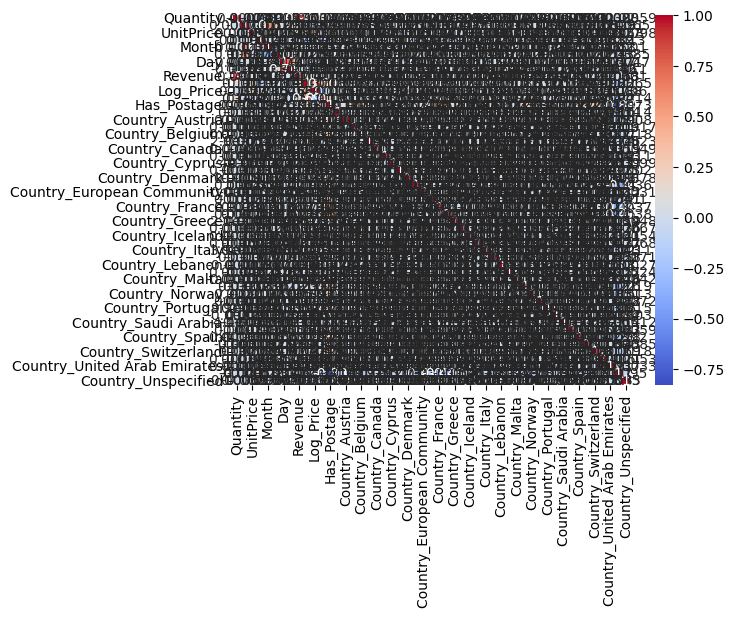

In [254]:
sns.heatmap(corr.corr(),annot=True,cmap='coolwarm')
plt.show()